## Feature Engineering

This workbook contains all necessary and possible steps of feature engineering before running the models.
This includes:
- dropping columns
- filling missing values
- outlier treatment
- train/test split
- normalization
- data transformation
- oversampling technique

### 1. Imports

In [1]:
# package imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.prep_datasets import pipeline_preparation

In [2]:
%matplotlib inline

In [3]:
# library imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### 2. Loading and preparing the data

In [4]:
# loading the dataset and calling the pipeline_preparation function
df = pd.read_csv("final_df_dec.csv")
df, df_2016 = pipeline_preparation(df)
df.head()

,oprev_turn_2016,oprev_turn_2015,oprev_turn_2014,oprev_turn_2013,oprev_turn_2012,netinc_2016,netinc_2015,netinc_2014,netinc_2013,netinc_2012,...,wc_2015,wc_2014,wc_2013,wc_2012,ebit_2016,ebit_2015,ebit_2014,ebit_2013,ebit_2012,bankrupt
0,-766.35,-7906.91,5816.03,18821.76,57891.48,-1812.06,-9470.22,868.65,7543.16,43498.62,...,NaN,NaN,NaN,NaN,-5824.87,-13714.53,-574.51,10786.05,31216.17,0
1,-38066.54,6595.85,6538.46,6033.35,-16398.63,6635.53,-117844.28,-12043.21,-65075.98,-62549.21,...,NaN,NaN,NaN,NaN,-42123.12,5689.15,5772.95,4640.32,-17129.81,0
2,-73110.61,-73994.18,-219163.04,-90426.31,-65.87,-145848.42,-141530.59,-280881.84,-203076.12,-146.32,...,NaN,NaN,NaN,NaN,-145182.90,-140783.81,-280590.36,-146308.52,-146.32,0
3,-28482.50,-32000.20,2570.26,9133.93,6622.08,-32358.51,-34233.79,118.54,5814.55,5723.77,...,NaN,NaN,NaN,NaN,-30769.77,-32322.32,2278.59,8806.28,6533.03,0
4,-2578.17,7294.13,0.01,4826.16,0.00,-40568.90,-31819.79,-37698.85,-77461.00,-11.65,...,NaN,NaN,NaN,NaN,-12652.25,-14650.90,-17555.11,-55605.31,-11.65,0


### 3. Feature engineering steps

In [5]:
# dropping all rows where the entire values are missing
def drop_cols(df):
    cols = df.columns[0:-1]
    df.dropna(axis = 0, subset = cols ,how = "all")
    return df

In [6]:
# filling the missing values, since there are infinite values inside replace them with NaN and fill missing values again
def fill_nan(df):
    cols = df.columns[0:-1]
    for cols in df:
        df[cols].fillna(df[cols].median(), inplace = True)
    
    df = df.replace([np.inf, -np.inf], np.nan)
    
    for cols in df:
        df[cols].fillna(df[cols].median(), inplace = True)
    return df

In [7]:
# a possible outlier caption method; NOT used
def outlier_cap(df):
    for column_name in df.columns:
        per_95 = np.percentile(df[column_name], 95)
        df[column_name] = df[column_name].apply(lambda x: per_95 if x > per_95 else x)
        per_05 = np.percentile(df[column_name], 5)
        df[column_name] = df[column_name].apply(lambda x: per_05 if x < per_05 else x)
    return df

In [8]:
# a possible outlier dropping method; NOT used
def outlier_drop(df):
    for column_name in df.columns:
        df = df.drop(np.argmax(df[column_name]))
        df = df.drop(np.argmin(df[column_name]))
    return df

In [9]:
# train-test-split
def data_split(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 30)
    return X_train, X_test, y_train, y_test

In [10]:
# scaling X_train, as the different variables are displayed in different units
def normalization(X_train, X_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)
    X_train = X_train.round(6)
    X_test = X_test.round(6)
    return X_train, X_test

In [11]:
# transforming the data since it is skewed
def transform(X_train, X_test):
    X_train = power_transform(X_train, method="yeo-johnson", copy=False)
    X_test = power_transform(X_test, method="yeo-johnson", copy=False)
    X_train = X_train.round(6)
    X_test = X_test.round(6)
    return X_train, X_test

In [12]:
# oversampling technique in order to train the model on a balanced dataset
def smote(X_train, y_train):
    sm = SMOTE(random_state = 2)
    X_train, y_train = sm.fit_sample(X_train, y_train)
    return X_train, y_train

### 4. Feature engineering pipeline

In [13]:
# final feature engineering pipeline
def pipeline_feature_eng(df):
    df = drop_cols(df)
    df = fill_nan(df)
    X_train, X_test, y_train, y_test = data_split(df)
    return df, X_train, X_test, y_train, y_test

In [14]:
# calling the feature engineering pipeline
df, X_train, X_test, y_train, y_test = pipeline_feature_eng(df)

In [15]:
# pipeline for logistic regression specific adjustments
def pipeline_logreg(X_train, X_test, y_train, y_test):
    X_train, X_test = normalization(X_train, X_test)
    X_train, X_test = transform(X_train, X_test)
    X_train, y_train = smote(X_train, y_train)
    return X_train, X_test, y_train, y_test

In [16]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = pipeline_logreg(X_train, X_test, y_train, y_test)

In [17]:
# pipeline for random forest specific adjustments
def pipeline_ranfor(X_train, X_test, y_train, y_test):
    X_train, y_train = smote(X_train, y_train)
    return X_train, X_test, y_train, y_test

In [18]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = pipeline_ranfor(X_train, X_test, y_train, y_test)

Text(0.5, 1.0, 'Data before the transformation process')

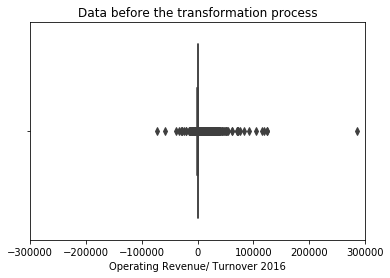

In [19]:
# visualization of oprev_turn_2016 before the transformation process
sns.boxplot(X_train["oprev_turn_2016"])
plt.xlabel('Operating Revenue/ Turnover 2016')
plt.ylabel(None)
plt.xlim(-300000, 300000)
plt.title("Data before the transformation process")

Text(0.5, 1.0, 'Data after the transformation process')

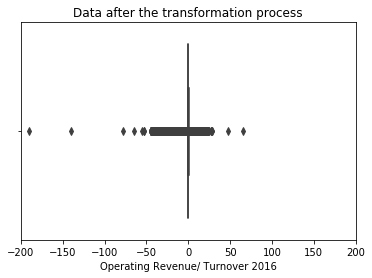

In [20]:
# visualization of oprev_turn_2016 after the transformation process
oprev_turn_2016_trans=[i[0] for i in X_train_lr]
sns.boxplot(x=oprev_turn_2016_trans)
plt.xlabel('Operating Revenue/ Turnover 2016')
plt.xlim(-200, 200)
plt.title("Data after the transformation process")

In [21]:
# statistics of the underlying data before the transformation process
X_train["oprev_turn_2016"].describe()

count    262833.000000
mean        460.040301
std        2058.404031
min      -73110.610000
25%          48.410000
50%         107.030000
75%         246.590000
max      489780.310000
Name: oprev_turn_2016, dtype: float64

In [22]:
# statistics of the underlying data after the transformation process
oprev_turn_2016_trans = pd.DataFrame(oprev_turn_2016_trans)
oprev_turn_2016_trans.describe()

,0
count,524220.000000
mean,0.112477
std,1.425705
min,-190.293864
25%,-0.252290
50%,-0.182878
75%,0.087949
max,65.423449
